<a href="https://colab.research.google.com/github/marsa04/riboseq_hw/blob/main/riboseq_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Анализ Ribo-seq" часть 1

Марат Сабиров, АДБМ-21

Я не смог запуситить DESeq2 в питоне через обертку rpy2. Поэтому первую часть домашнего задания сделал в R в этом коллаб - ноутбуке. Он настроен так, что в ячейках по умолчанию R.

Вторая часть задания (Анализ wig-файла) будет отправлена отдельным ноутбуком.

# Задание 1. Определение дифференциальной экспрессии

Предобработка даных

In [3]:
library(stringr)

In [4]:
df <- read.csv('https://cloud.ibgene.org/s/Qn6aBpPyc4X6SjE/download/01.%20RiboSeq_RNASeq_HCC_counts.tsv', sep='\t')

In [5]:
head(df)

,geneID,geneSymbol,LC001.normal.RPF,LC001.tumor.RPF,LC001.normal.RNA,LC001.tumor.RNA,LC033.normal.RPF,LC033.tumor.RPF,LC033.normal.RNA,LC033.tumor.RNA,⋯,LC507.normal.RNA,LC507.tumor.RNA,LC508.normal.RPF,LC508.tumor.RPF,LC508.normal.RNA,LC508.tumor.RNA,LC509.normal.RPF,LC509.tumor.RPF,LC509.normal.RNA,LC509.tumor.RNA
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,⋯,218,457,0,0,200,889,0,0,161,857
2,ENSG00000000005.5,TNMD,0,0,0,1,0,0,0,1,⋯,0,0,1,0,0,0,0,0,0,NA
3,ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,⋯,92,170,109,357,60,244,141,173,56,83
4,ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,⋯,127,176,67,176,55,261,64,100,68,176
5,ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,⋯,124,437,7,167,34,201,6,61,9,58
6,ENSG00000000938.12,FGR,0,6,19,9,14,13,61,24,⋯,94,13,3,9,42,26,7,10,26,57


уже в head(df) в последней колонке заметил Na. Проверим данные на пропущенные значения и решим что с ними делать

In [6]:
colSums(is.na(df))

geneID       geneSymbol LC001.normal.RPF  LC001.tumor.RPF 
               0                0                0                0 
LC001.normal.RNA  LC001.tumor.RNA LC033.normal.RPF  LC033.tumor.RPF 
               0                0                0                0 
LC033.normal.RNA  LC033.tumor.RNA LC034.normal.RPF  LC034.tumor.RPF 
               0                0                0                0 
LC034.normal.RNA  LC034.tumor.RNA LC501.normal.RPF  LC501.tumor.RPF 
               0                0                0                0 
LC501.normal.RNA  LC501.tumor.RNA LC502.normal.RPF  LC502.tumor.RPF 
               0                0                0                0 
LC502.normal.RNA  LC502.tumor.RNA LC505.normal.RPF  LC505.tumor.RPF 
               0                0                0                0 
LC505.normal.RNA  LC505.tumor.RNA LC506.normal.RPF  LC506.tumor.RPF 
               0                0                0                0 
LC506.normal.RNA  LC506.tumor.RNA LC507.normal.RPF  LC507.tumor.RPF 
               0                0                0                0 
LC507.normal.RNA  LC507.tumor.RNA LC508.normal.RPF  LC508.tumor.RPF 
               0                0                0                0 
LC508.normal.RNA  LC508.tumor.RNA LC509.normal.RPF  LC509.tumor.RPF 
               0                0                0                0 
LC509.normal.RNA  LC509.tumor.RNA 
               0             2688

Na есть только в одном сэмпле LC509-tumor-RNA. Посмотрим на распределение каунтов для генов у которых есть Na в других tumor-RNA образцах.

In [7]:
df[which(is.na(df$LC509.tumor.RNA)), str_detect(colnames(df), 'tumor.RNA')]

,LC001.tumor.RNA,LC033.tumor.RNA,LC034.tumor.RNA,LC501.tumor.RNA,LC502.tumor.RNA,LC505.tumor.RNA,LC506.tumor.RNA,LC507.tumor.RNA,LC508.tumor.RNA,LC509.tumor.RNA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,1,1,0,0,0,0,0,0,0,NA
24,1,1,169,2,8,38,6,1,17,NA
25,0,0,0,0,0,0,0,0,0,NA
60,1,0,1,1,0,0,1,1,0,NA
121,0,1,9,0,0,0,0,0,0,NA
124,0,0,0,0,0,0,0,2,0,NA
156,0,0,9,0,1,0,0,0,0,NA
167,1,6,58,0,0,0,2,3,1,NA
173,0,0,0,0,0,0,0,0,1,NA


сложно сказать каким значением лучше всего заполнить Na. Для простоты заполним 0, для большинства генов это самое часто встречаемое значение (визуально в большинстве случаев одни нули)

In [8]:
df[is.na(df)] <- 0

приведем данные в стандартный формат каунт матрицы

In [9]:
rownames(df) = df$geneID
df$geneID = NULL
df$geneSymbol = NULL
head(df)

,LC001.normal.RPF,LC001.tumor.RPF,LC001.normal.RNA,LC001.tumor.RNA,LC033.normal.RPF,LC033.tumor.RPF,LC033.normal.RNA,LC033.tumor.RNA,LC034.normal.RPF,LC034.tumor.RPF,⋯,LC507.normal.RNA,LC507.tumor.RNA,LC508.normal.RPF,LC508.tumor.RPF,LC508.normal.RNA,LC508.tumor.RNA,LC509.normal.RPF,LC509.tumor.RPF,LC509.normal.RNA,LC509.tumor.RNA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
ENSG00000000003.14,0,0,402,873,0,0,301,1627,0,0,⋯,218,457,0,0,200,889,0,0,161,857
ENSG00000000005.5,0,0,0,1,0,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,0
ENSG00000000419.12,168,239,88,187,114,439,66,201,325,117,⋯,92,170,109,357,60,244,141,173,56,83
ENSG00000000457.13,65,121,60,106,36,163,70,156,130,76,⋯,127,176,67,176,55,261,64,100,68,176
ENSG00000000460.16,8,43,18,70,16,76,4,63,44,14,⋯,124,437,7,167,34,201,6,61,9,58
ENSG00000000938.12,0,6,19,9,14,13,61,24,15,62,⋯,94,13,3,9,42,26,7,10,26,57


оставим гены с больше, чем хотя бы одним прочтением в среднем на образец

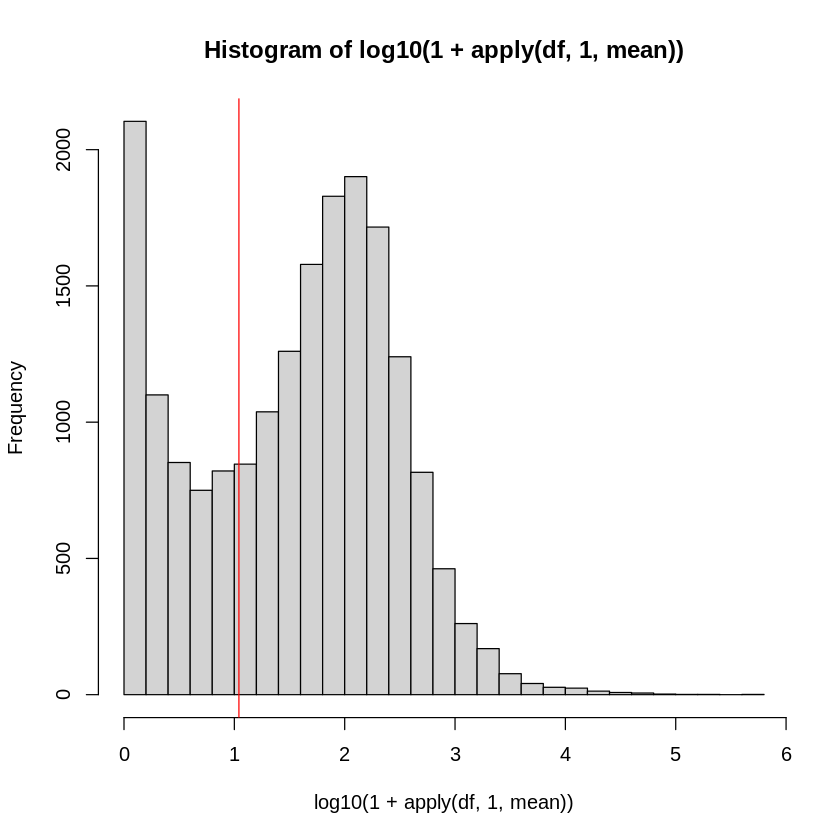

In [10]:
hist(log10(1+apply(df,1,mean)),40) 
abline(v=log10(1+10),col='red') 

In [11]:
dim(df)

[1] 18945    40

In [11]:
sum(apply(df,1,mean) >= 1)

[1] 16264

в анализе останется 16264 из 18945 генов

In [12]:
df = df[apply(df,1,mean) >= 1,] 

## 1.1
Для каждого гена найдите коэффициент корреляции числа каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или Спирмена? Обратите внимание, что перед вами не нормированные на глубину библиотеки каунты, учтите это при анализе.

Будем использовать корреляцию Спирмена для того, что избежать только линейной зависимости. Нормируем данные методом CPM (counts per million), чтобы учесть разную глубину библиотек

In [13]:
cpm = sweep(df,2,apply(df, 2,sum),'/')*1e6 

создадим сабсеты каунт матриц для каждого типа экспериментов

In [14]:
rnaseq = cpm[, str_detect(colnames(cpm), 'RNA')]
riboseq = cpm[, str_detect(colnames(cpm), 'RPF')]

считаем корреляцию

In [ ]:
cpm$cors = sapply(1:nrow(as.matrix(rnaseq)), function(i) cor(as.matrix(rnaseq)[i,], as.matrix(riboseq)[i,],m='sp'))

## 1.2
Постройте гистограмму распределения этих коэффициентов корреляции. Для каких генов корреляция самая высокая, а для каких — самая низкая? Как вы можете это объяснить?

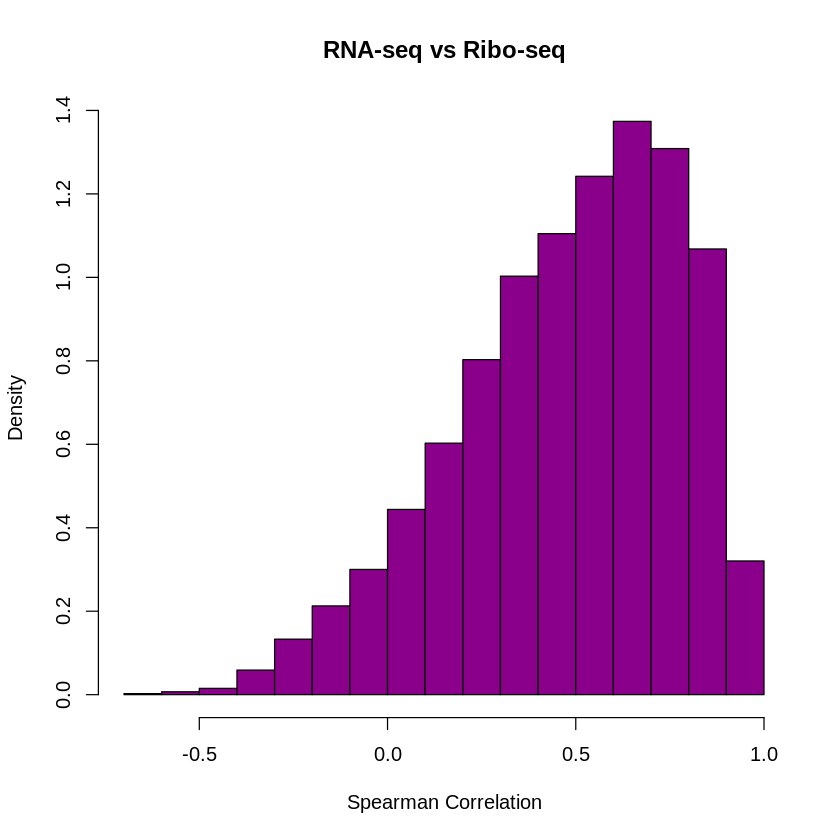

In [16]:
hist(cpm$cors,
main="RNA-seq vs Ribo-seq",
xlab="Spearman Correlation",
#xlim=c(50,100),
col="darkmagenta",
freq=FALSE
)

Рассмотрим топ-5 по наивысшей и наименьшей корреляции. У генов с высокой корреляцией топ 3 это гены с очень низкой экспрессией (почти во всех образцах 0), их исключим из анализа

гены с высокой корреляцией

In [17]:
high.cor = t(head(cpm[order(cpm$cors, decreasing = T),],8)[4:8,1:40])
high.cor = data.frame(high.cor)
high.cor$tissue = unlist(lapply(rownames(high.cor), function(x) strsplit(x, ".", fixed = TRUE)[[1]][2]))
high.cor$seq = unlist(lapply(rownames(high.cor), function(x) strsplit(x, ".", fixed = TRUE)[[1]][3]))

получили табличку, в которой будет проще анализировать природу высокой корреляции

In [18]:
head(high.cor)

,ENSG00000151715.7,ENSG00000167910.3,ENSG00000187048.12,ENSG00000124253.10,ENSG00000175336.9,tissue,seq
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LC001.normal.RPF,11.222731,117.5714652,661.07228,3212.55122,510.36704,normal,RPF
LC001.tumor.RPF,8.456896,4.4633618,49.33189,226.45688,39.23060,tumor,RPF
LC001.normal.RNA,7.891350,60.1997278,524.21111,2792.63606,272.36431,normal,RNA
LC001.tumor.RNA,4.945559,0.8242598,11.95177,70.68028,10.30325,tumor,RNA
LC033.normal.RPF,25.774805,20.5360237,398.77605,1107.47842,311.60273,normal,RPF
LC033.tumor.RPF,201.031296,158.1371533,211.11086,1419.09056,107.40335,tumor,RPF


построим распределение СРМ для генов с высокой корреляцией в зависимости от типа эксперимента и типа ткани

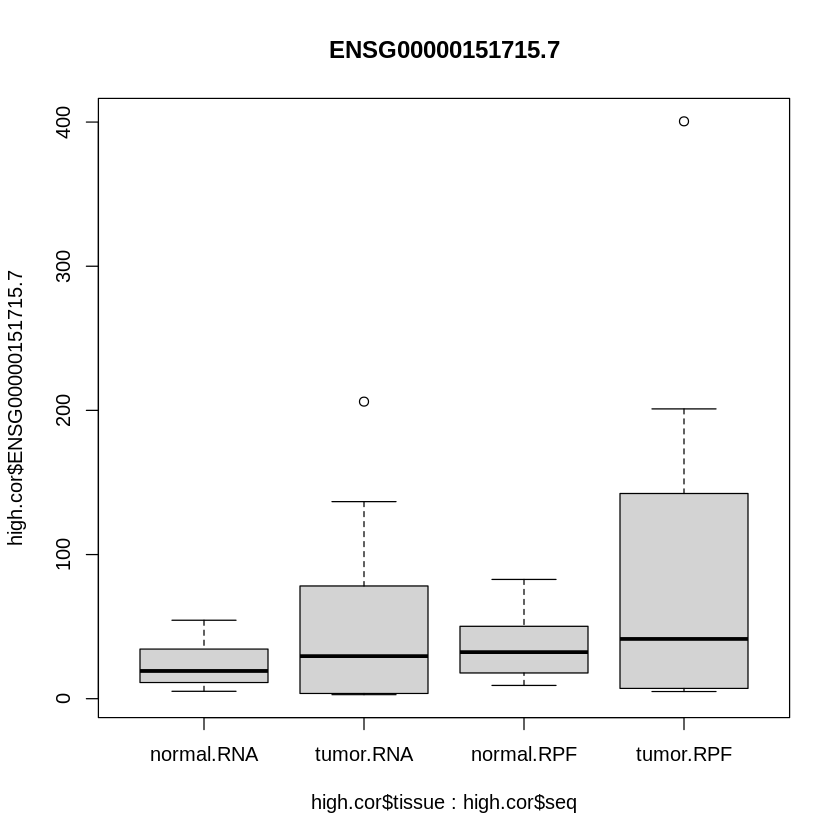

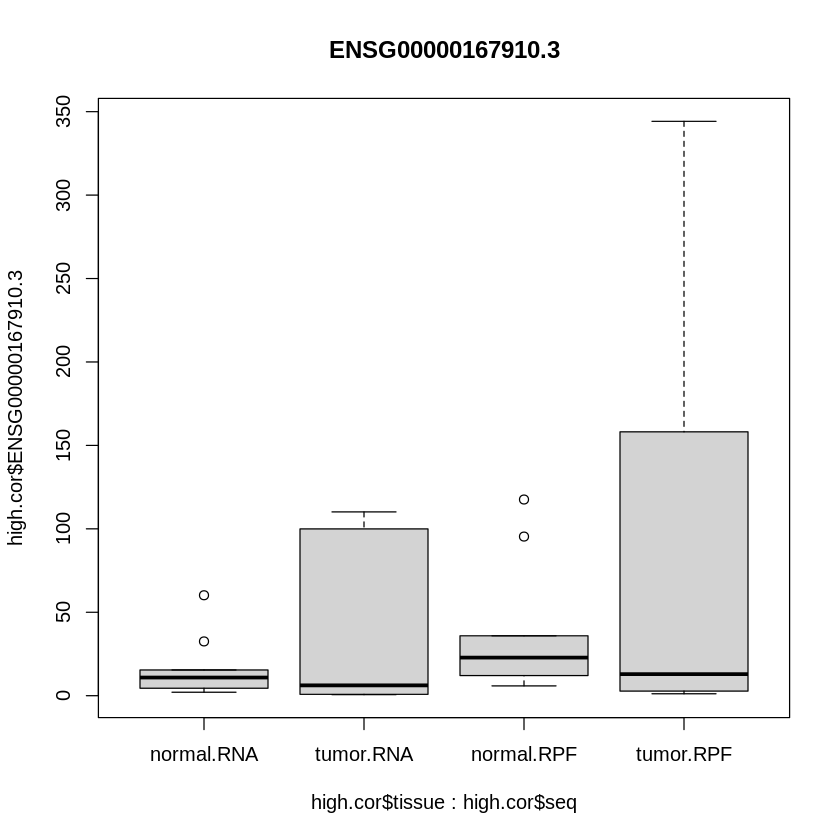

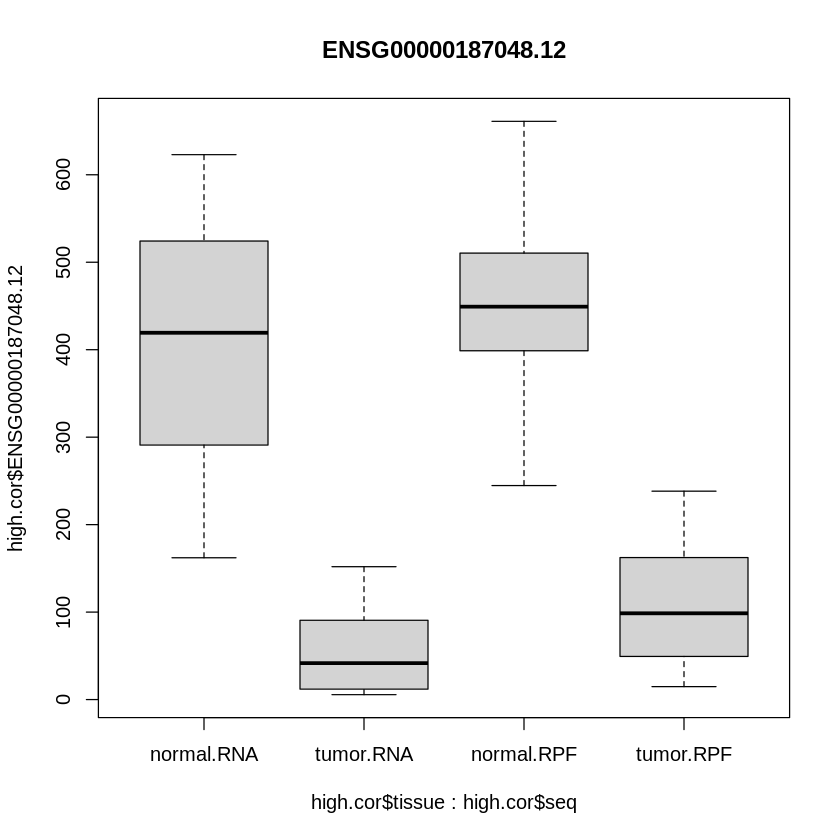

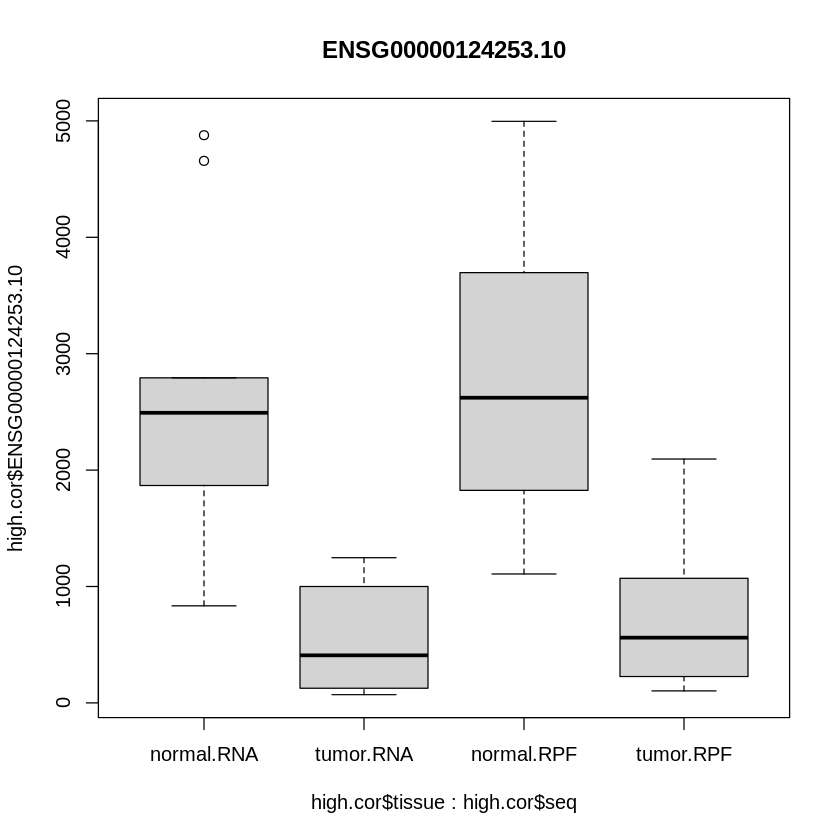

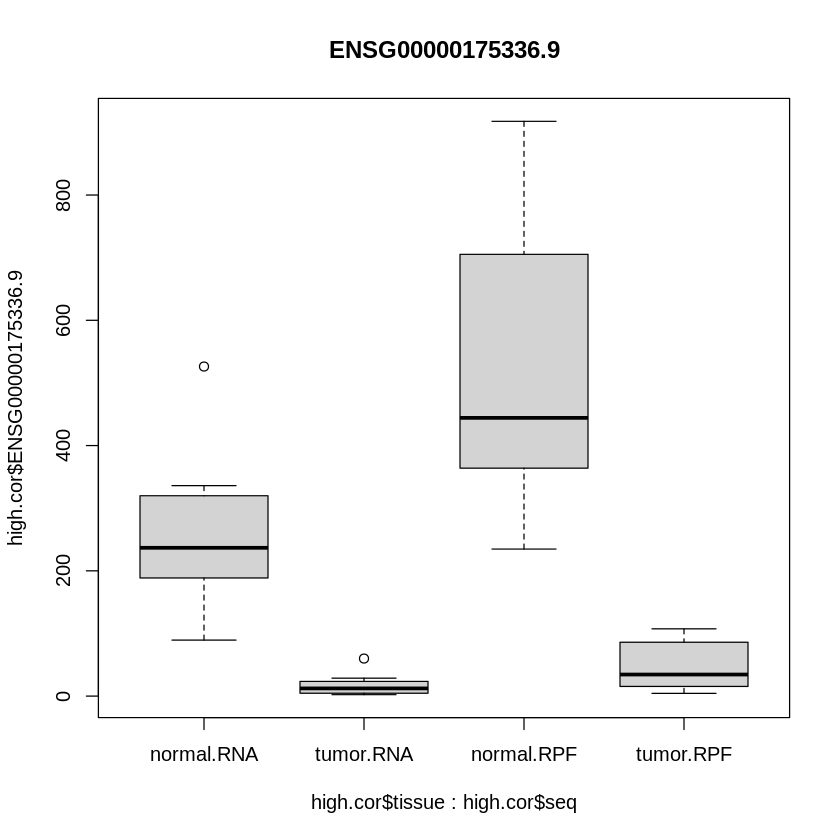

In [19]:
p1 = boxplot(high.cor$`ENSG00000151715.7` ~ high.cor$tissue:high.cor$seq, main = 'ENSG00000151715.7')
p2 = boxplot(high.cor$`ENSG00000167910.3` ~ high.cor$tissue:high.cor$seq, main = 'ENSG00000167910.3')
p3 = boxplot(high.cor$`ENSG00000187048.12` ~ high.cor$tissue:high.cor$seq, main = 'ENSG00000187048.12')
p4 = boxplot(high.cor$`ENSG00000124253.10` ~ high.cor$tissue:high.cor$seq, main = 'ENSG00000124253.10')
p5 = boxplot(high.cor$`ENSG00000175336.9` ~ high.cor$tissue:high.cor$seq, main = 'ENSG00000175336.9')

визуально первые два гена апрегулированы в tumor образцах, а осатвшиеся три явно апрегуляированы в normal. При этом, это не зависит от типа эксперимента.

гены с низкой экспрессией (делаем тоже самое)

In [20]:
low.cor = t(head(cpm[order(cpm$cors),],5)[,1:40])
low.cor = data.frame(low.cor)
low.cor$tissue = unlist(lapply(rownames(low.cor), function(x) strsplit(x, ".", fixed = TRUE)[[1]][2]))
low.cor$seq = unlist(lapply(rownames(low.cor), function(x) strsplit(x, ".", fixed = TRUE)[[1]][3]))

In [21]:
head(low.cor)

,ENSG00000167874.6,ENSG00000179476.7,ENSG00000179965.11,ENSG00000125843.10,ENSG00000203896.9,tissue,seq
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LC001.normal.RPF,0.0000000,0.000000,1.781386,1.7813858,13.716671,normal,RPF
LC001.tumor.RPF,2.5840516,0.000000,4.698276,11.9806027,21.846981,tumor,RPF
LC001.normal.RNA,1.8037372,5.411211,17.811904,12.8516273,1.352803,normal,RNA
LC001.tumor.RNA,0.0000000,5.151624,6.800143,5.1516236,0.000000,tumor,RNA
LC033.normal.RPF,0.0000000,0.000000,0.000000,0.8382051,6.705640,normal,RPF
LC033.tumor.RPF,0.3359855,0.000000,1.903918,1.9039176,9.407593,tumor,RPF


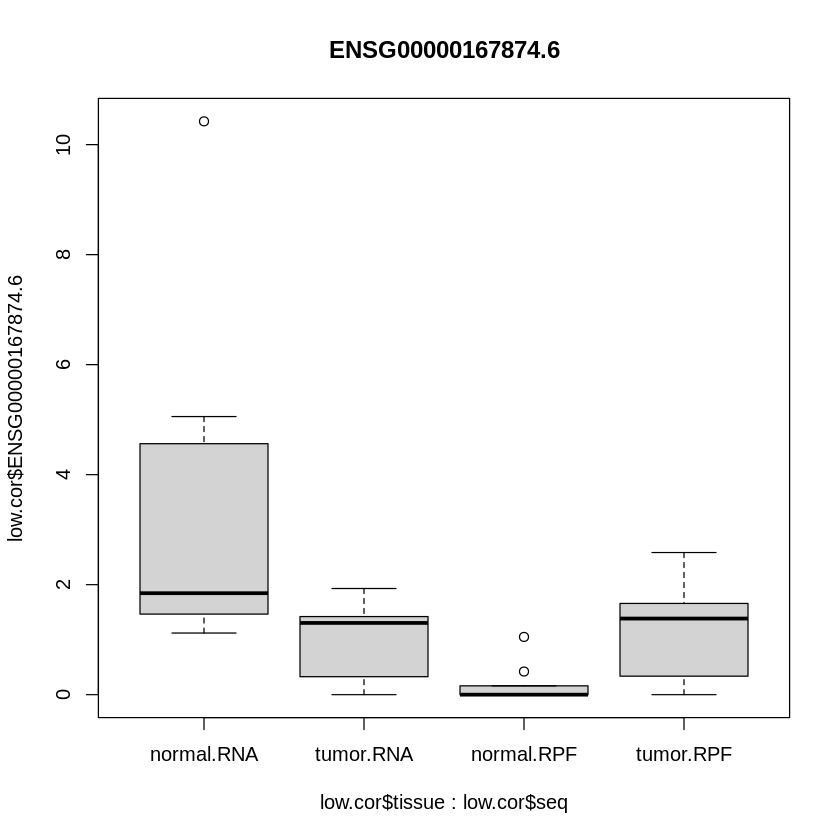

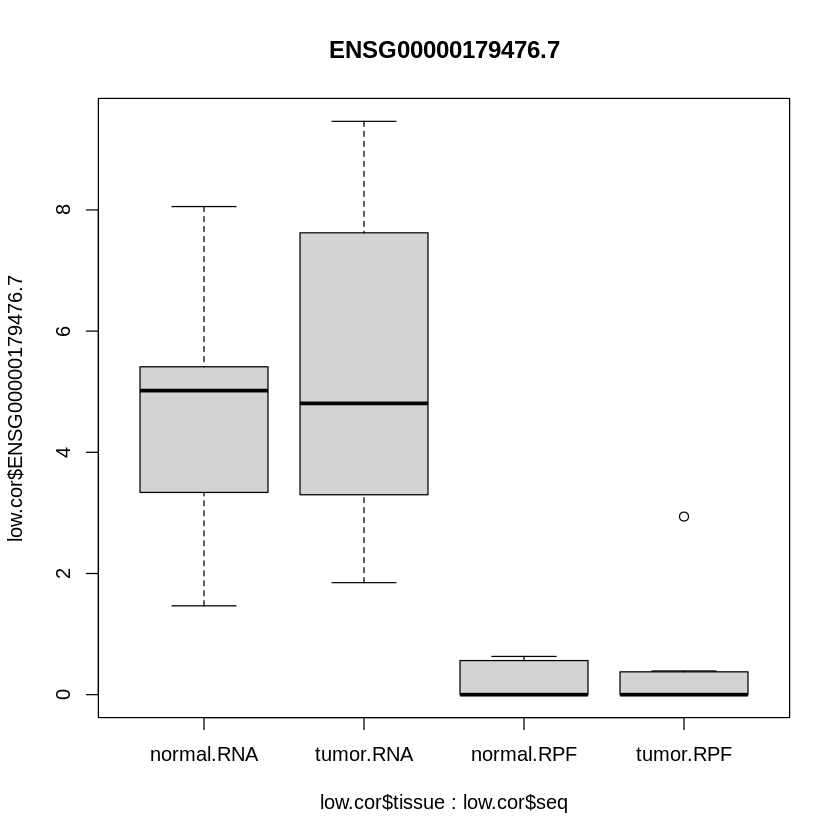

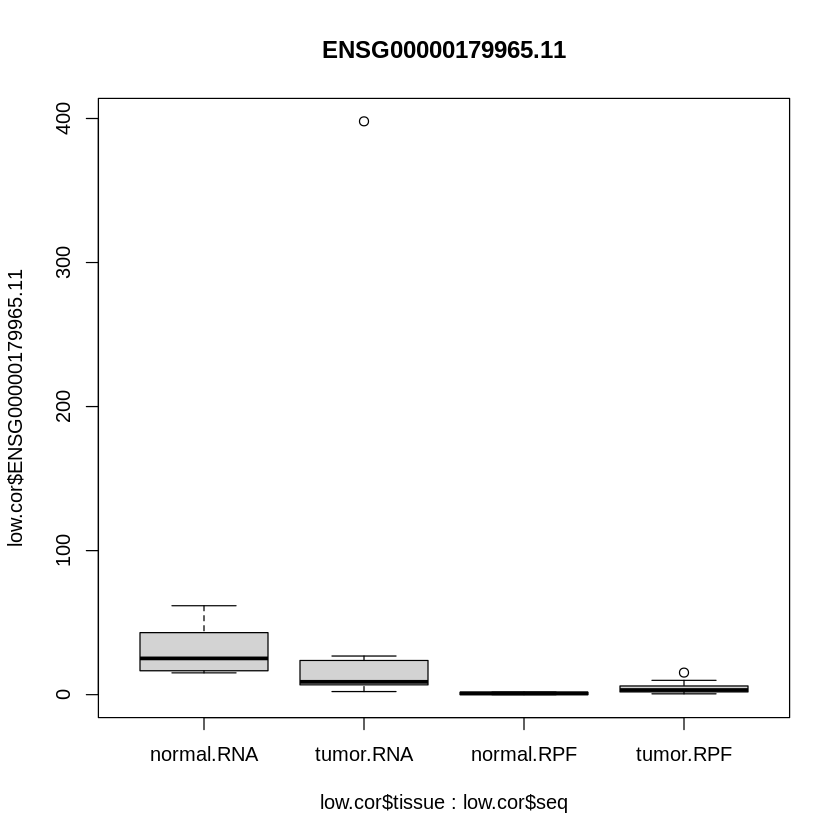

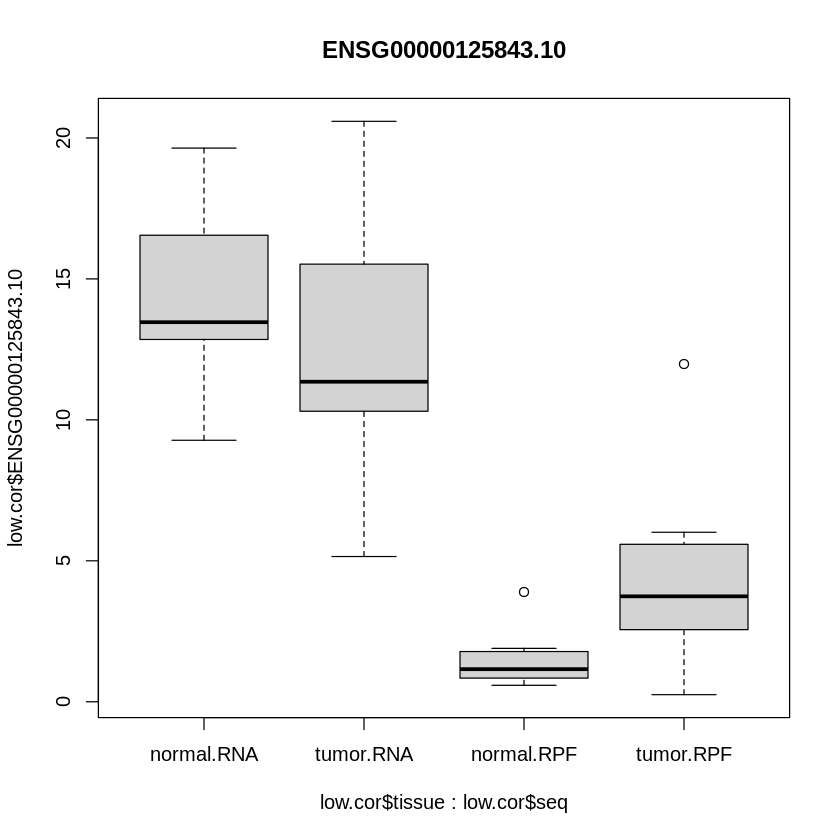

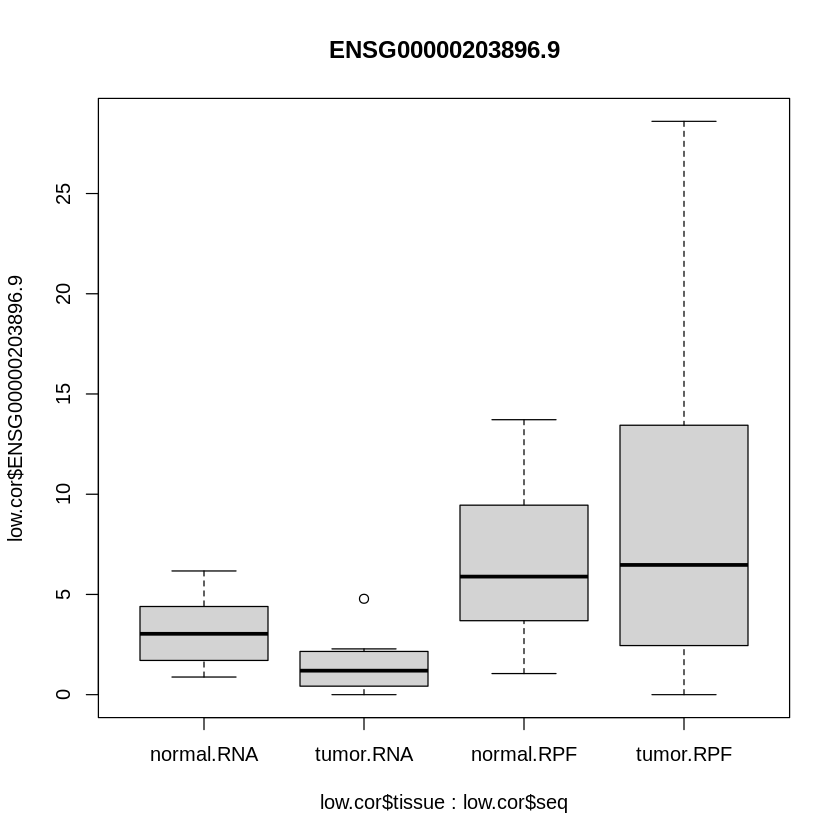

In [22]:
p1 = boxplot(low.cor$`ENSG00000167874.6` ~ low.cor$tissue:low.cor$seq, main = 'ENSG00000167874.6')
p2 = boxplot(low.cor$`ENSG00000179476.7` ~ low.cor$tissue:low.cor$seq,, main = 'ENSG00000179476.7')
p3 = boxplot(low.cor$`ENSG00000179965.11` ~ low.cor$tissue:low.cor$seq,, main = 'ENSG00000179965.11')
p4 = boxplot(low.cor$`ENSG00000125843.10` ~ low.cor$tissue:low.cor$seq,, main = 'ENSG00000125843.10')
p5 = boxplot(low.cor$`ENSG00000203896.9` ~ low.cor$tissue:low.cor$seq,, main = 'ENSG00000203896.9')

Первый, четвертый и пятый гены апрегулированы визуально в normal в RNA-seq, при этом апрегулирован в tumor в Ribo-seq. Для второго и третьего гена уровень CPM сильно отличаются между RNA-seq и Ribo-seq экспериментами. 

В общем, видно что для генов с высокой корреляцией есть зависимость в уровне экспресии в зависимости от типа ткани (normal/tumour), и тип эксперимента тут не влияет. ДЛя генов с отрицательной корреляцией, этой зависимости нет.

## 1.3
Проанализируйте распределение каунтов Ribo-seq: постройте зависимость дисперсии от среднего. Похоже ли это на NB-распределение? Если нет, то на какое похоже? Если да, то какие статистические тесты можно использовать для подтверждения того, что перед вами NB-распределение?

In [26]:
count.riboseq = df[, str_detect(colnames(df), 'RPF')]

In [24]:
head(count.riboseq)

,LC001.normal.RPF,LC001.tumor.RPF,LC033.normal.RPF,LC033.tumor.RPF,LC034.normal.RPF,LC034.tumor.RPF,LC501.normal.RPF,LC501.tumor.RPF,LC502.normal.RPF,LC502.tumor.RPF,LC505.normal.RPF,LC505.tumor.RPF,LC506.normal.RPF,LC506.tumor.RPF,LC507.normal.RPF,LC507.tumor.RPF,LC508.normal.RPF,LC508.tumor.RPF,LC509.normal.RPF,LC509.tumor.RPF
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000419.12,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
ENSG00000000457.13,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
ENSG00000000460.16,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61
ENSG00000000938.12,0,6,14,13,15,62,5,5,22,5,0,4,18,6,8,1,3,9,7,10
ENSG00000000971.15,20021,1902,18200,34652,46412,1579,17119,7094,54669,63847,35240,29867,16852,23994,20354,12611,24558,12238,19747,27766


посчитаем среднее и дисперсию

In [27]:
count.riboseq$mean = apply(count.riboseq, 1, mean)
count.riboseq$sd = apply(count.riboseq[,1:20], 1, sd)

отрисуем зависимость

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 302 rows containing non-finite values (`stat_smooth()`).”


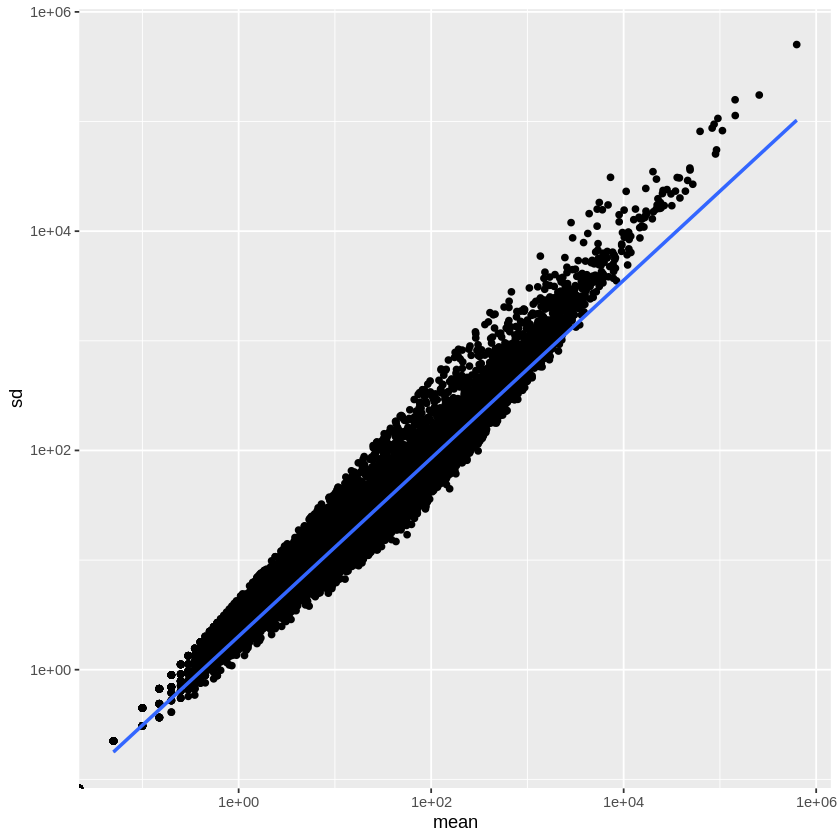

In [28]:
library(ggplot2)
ggplot(data=count.riboseq, aes(x=mean, y=sd)) +
  geom_point() +
  scale_x_log10() +
  scale_y_log10() +
  geom_smooth(method = 'glm')

У каждого гена дисперсия больше среднего, это похоже похоже на NB-распределение.

## 1.4
Найдите дифференциально экспрессированные гены по RNA-Seq между нормой и опухолью.
Постройте volcano plot.
То же самое сделайте и для Ribo-Seq эксперимента.
Совпадают ли результаты дифференциальной экспрессии? Какие гены оказались значимо различны по экспрессии в одном случае, а какие — в другом?
Проведите похожий анализ, только с поиском генов с разницей в эффективности трансляции (~ method + condition + method:condition). Что вы скажете о наборе генов, который вы получили этим методом?
Выводы подкрепите графиками.


Для начала найдем ДЭГи отдельно по RNA-seq и Ribo-seq эксериментам
сделаем сабсеты с сырыми каунтами для каждого типа эксперимента. Используем библиотеку DESeq2

In [29]:
count.riboseq = df[, str_detect(colnames(df), 'RPF')]
#colnames(count.riboseq) = unlist(lapply(colnames(count.riboseq), function(x) str_c(strsplit(x, ".", fixed = TRUE)[[1]][1:2], collapse=".")))
count.rnaseq = df[, str_detect(colnames(df), 'RNA')]
#colnames(count.rnaseq) = unlist(lapply(colnames(count.rnaseq), function(x) str_c(strsplit(x, ".", fixed = TRUE)[[1]][1:2], collapse=".")))

In [30]:
#  Матрица дизайна для RNA-seq
tissue = as.factor(unlist(lapply(colnames(count.rnaseq), function(x) strsplit(x, ".", fixed = TRUE)[[1]][2])))
samples = as.factor(colnames(count.rnaseq))

design.rna = data.frame(samples, tissue)
rownames(design.rna) = samples

#  Матрица дизайна для Ribo-seq
tissue = as.factor(unlist(lapply(colnames(count.riboseq), function(x) strsplit(x, ".", fixed = TRUE)[[1]][2])))
samples = as.factor(colnames(count.riboseq))

design.ribo = data.frame(samples, tissue)
rownames(design.ribo) = samples

In [ ]:
# устанавливаем пакет DESeq2 (может занять 10-15 минут).
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

In [ ]:
library(DESeq2)

стандартный анализ

In [33]:
dds.rna = DESeqDataSetFromMatrix(countData = count.rnaseq, colData = design.rna, design = ~ tissue)
dds.ribo = DESeqDataSetFromMatrix(countData = count.riboseq, colData = design.ribo, design = ~ tissue)

converting counts to integer mode



In [ ]:
dds.rna = DESeq(dds.rna)
dds.ribo = DESeq(dds.ribo)

In [35]:
vsdata.rna = vst(dds.rna, blind = F)
vsdata.ribo = vst(dds.ribo, blind = F)

посмотрим как распределяются данные на PCA

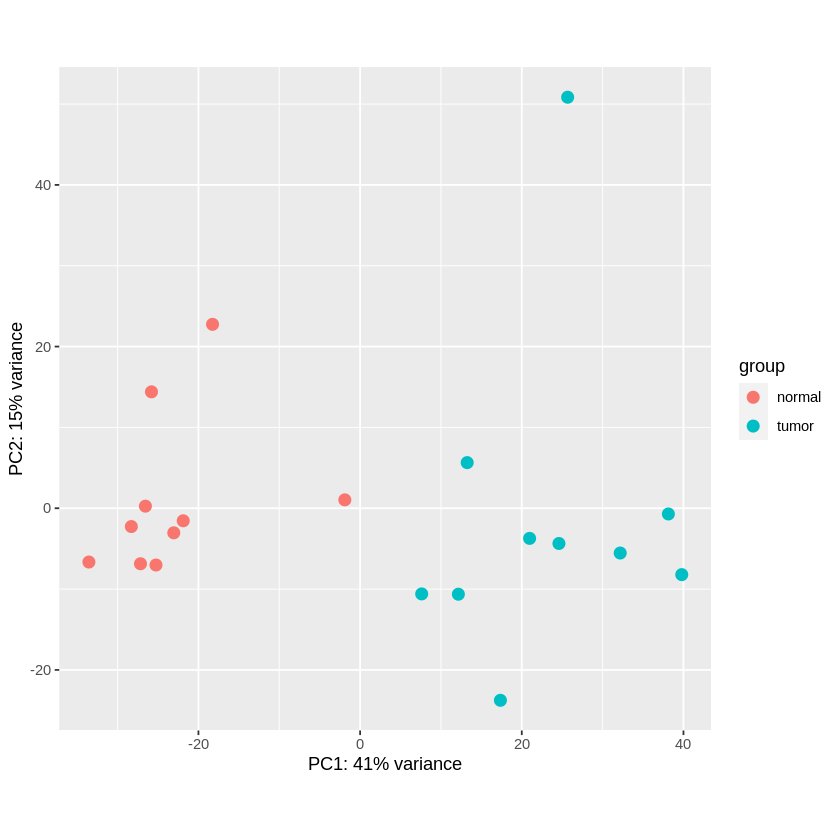

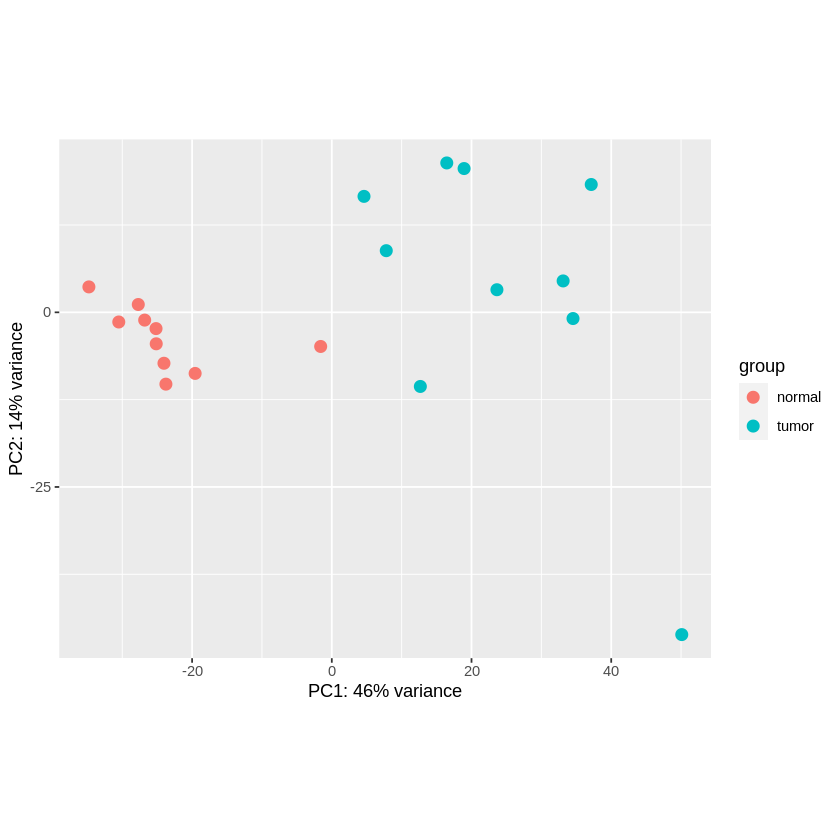

In [36]:
plotPCA(vsdata.rna, intgroup='tissue')
plotPCA(vsdata.ribo, intgroup='tissue')

образцы достаточно хорошо разделяются первыми двумя главными компонентами по типу ткани для обоих типов экспериментов

отбираем статистически значимые дифференциально экспрессирующиеся гены (ДЭГи)

In [37]:
res.rna = results(dds.rna, contrast = c('tissue', 'tumor','normal'))
res.ribo = results(dds.ribo, contrast = c('tissue', 'tumor','normal'))

In [38]:
sigs.rna = na.omit(res.rna)
sigs.rna = sigs.rna[sigs.rna$padj<0.05,]

sigs.ribo = na.omit(res.ribo)
sigs.ribo = sigs.ribo[sigs.ribo$padj<0.05,]

Строим вулкан-плоты

In [ ]:
BiocManager::install('EnhancedVolcano')

Loading required package: ggrepel



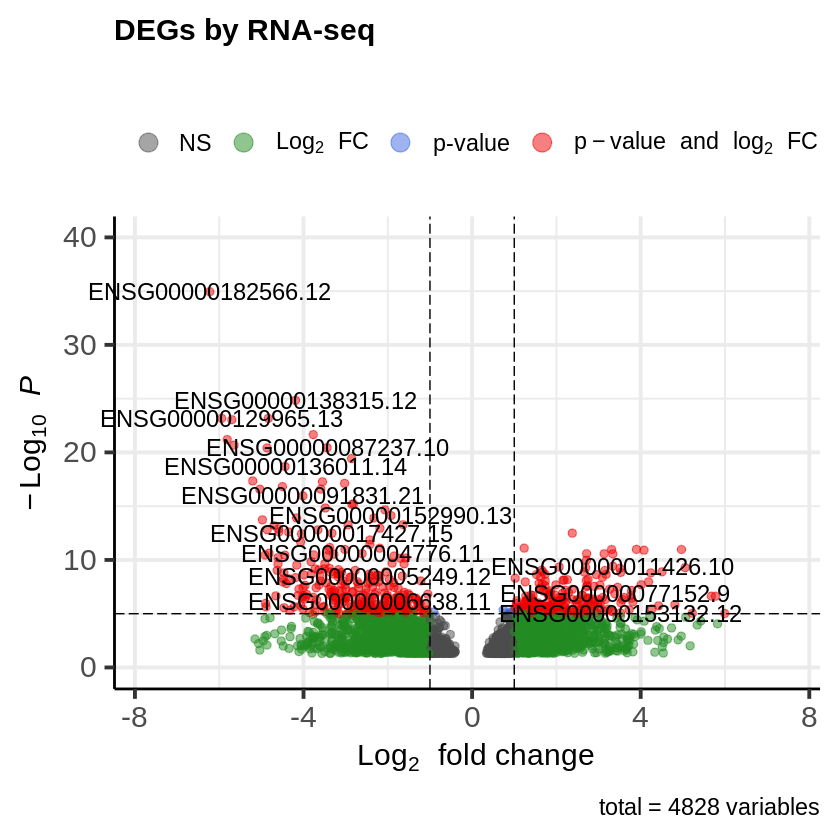

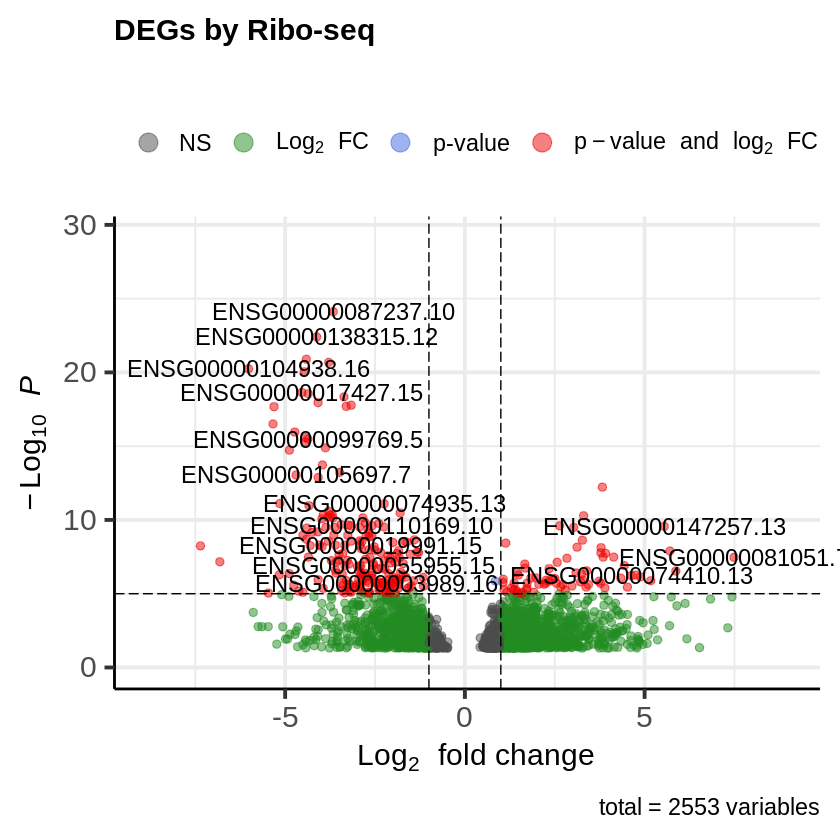

In [40]:
library(EnhancedVolcano)
EnhancedVolcano(sigs.rna, x = 'log2FoldChange', y = 'padj', lab = rownames(sigs.rna), title = 'DEGs by RNA-seq', subtitle = "")
EnhancedVolcano(sigs.ribo, x = 'log2FoldChange', y = 'padj', lab = rownames(sigs.ribo), title = 'DEGs by Ribo-seq', subtitle = '')

Я не переводил ENSEMBL id в символьные обозначения генов, поэтому так конечно сложнее оценить гены, которые в топе. Но если внимательно присмотреться, то многие ENSEMBL id из топа одни и теже, только в разной последовательности. Также видно, что в результате анализа RNA-seq данные мы получили больше ДЭГов (4828), чем при анализе Ribo-seq данных (2553).

посмотрим на сколько перерываются ДЭГи на диаграмме Венна

создадим переменные со списками ДЭГов для каждого типа эксперимента

In [41]:
degs.rna = rownames(sigs.rna)
degs.ribo = rownames(sigs.ribo)

In [42]:
install.packages('gplots')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘gplots’


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess




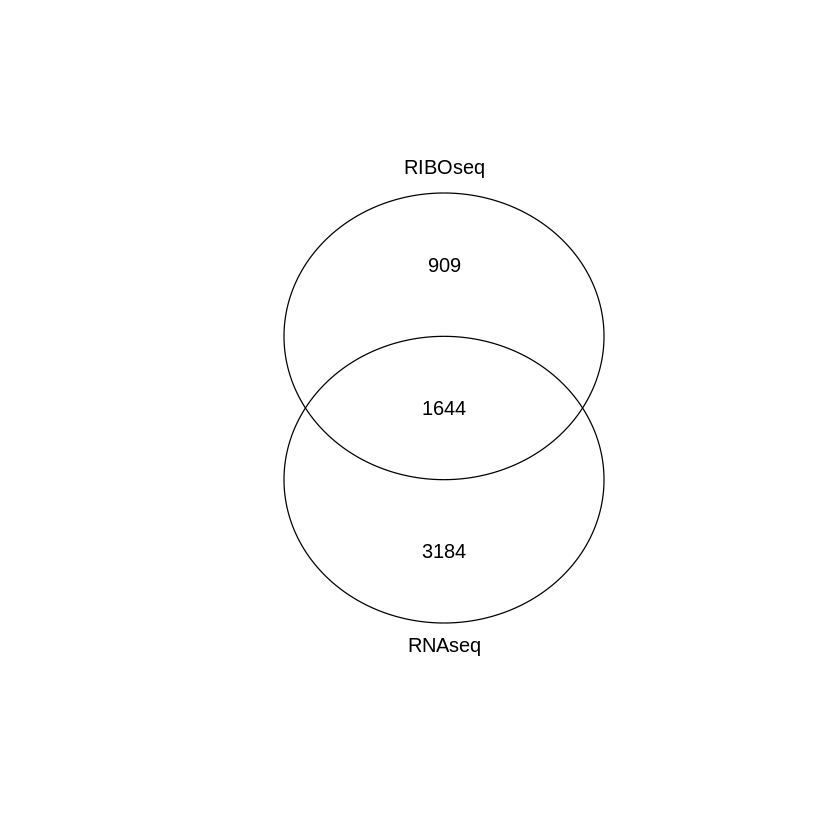

In [43]:
library("gplots")
gplots::venn(list(RNAseq = degs.rna, RIBOseq = degs.ribo))

Гены пересекаются не слишком значительно. Но, все таки, для Ribo-seq данных 2/3 генов пересекаются с RNA-seq.

Проведём похожий анализ, только с поиском генов с разницей в эффективности трансляции (~ method + condition + method:condition).

Теперь используем целую каунт матрицу, поменяем немного матрицу дизайна и формулу

In [44]:
#  Матрица дизайна 
condition = as.factor(unlist(lapply(colnames(df), function(x) strsplit(x, ".", fixed = TRUE)[[1]][2])))
method = as.factor(unlist(lapply(colnames(df), function(x) strsplit(x, ".", fixed = TRUE)[[1]][3])))
samples = as.factor(colnames(df))

design= data.frame(method, condition)
rownames(design) = samples

In [ ]:
dds = DESeqDataSetFromMatrix(countData = df, colData = design, design = ~ method + condition + method:condition)
dds = DESeq(dds)
vsdata = vst(dds, blind = F)

Для интереса опять посмотрим на РСА

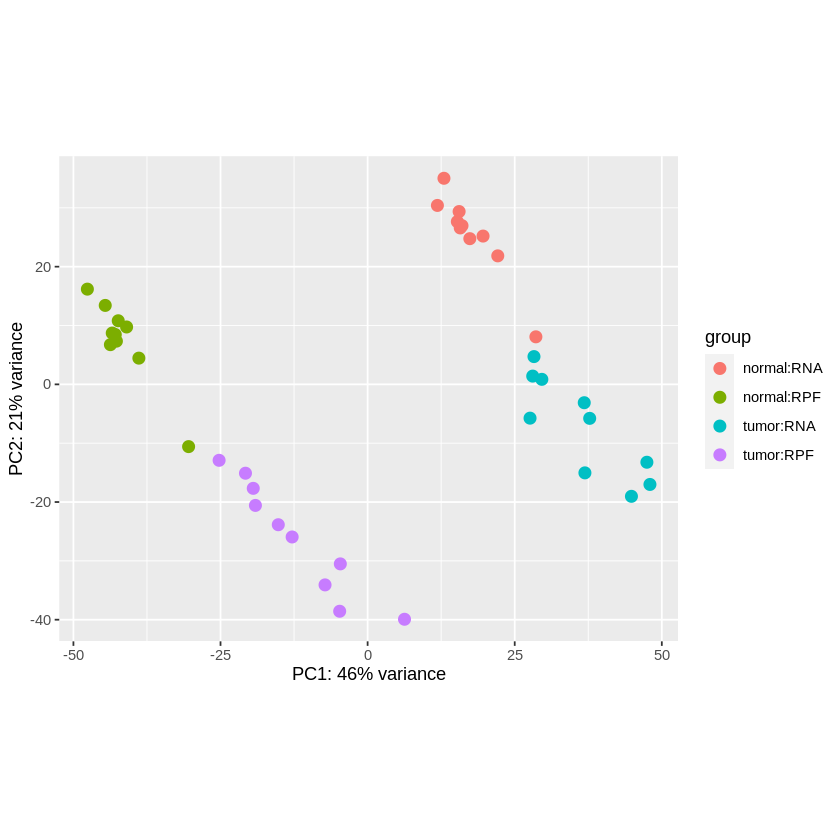

In [46]:
plotPCA(vsdata, intgroup=c('condition', 'method'))

образцы в первую очередь разделяются по типу эксперимента, а не по типу ткани. Однако, перемешивания образцов по типу ткани внутри групп от разных типов экспериментов не наблюдается.


Получим ДЭГи и построим вулкан-плот

In [47]:
res = results(dds, contrast = c('condition', 'tumor','normal'))

In [48]:
# select significant genes
sigs = na.omit(res)
sigs = sigs[sigs$padj<0.05,]

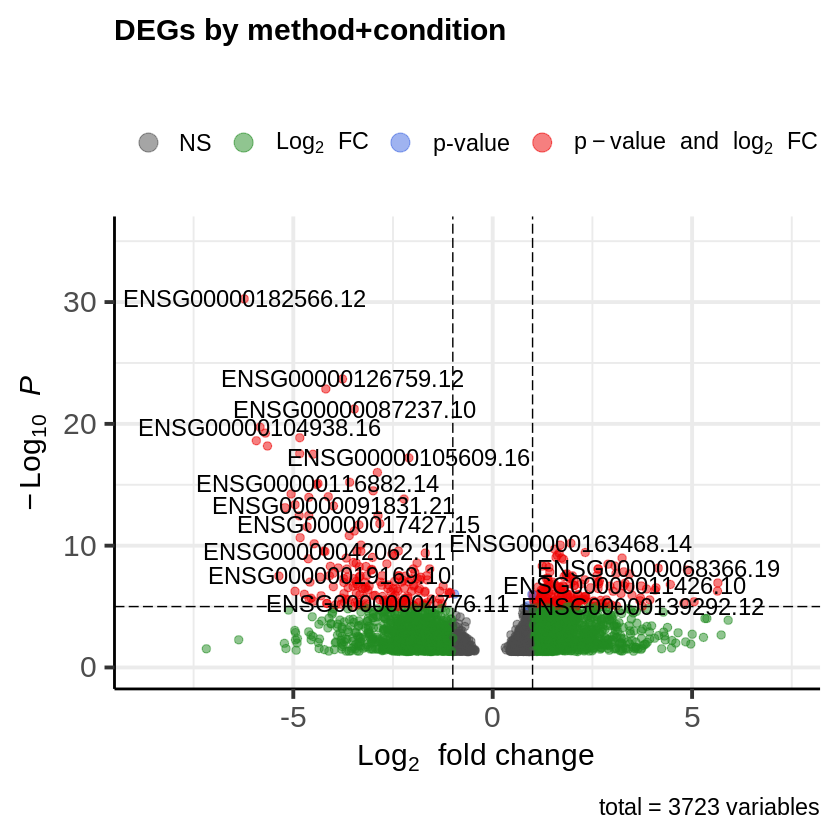

In [49]:
EnhancedVolcano(sigs, x = 'log2FoldChange', y = 'padj', lab = rownames(sigs), title = 'DEGs by method+condition', subtitle = "")

посмотрим как пересекаются выявленные ДЭГи из трех вариантов анализа

создадим переменную со списком ДЭГов из последнего варианта анализа

In [50]:
degs.both = rownames(sigs)

Посторим диаграмму Венна чтобы оценить пересечения в индентифицированных ДЭГах для трех типов анализа

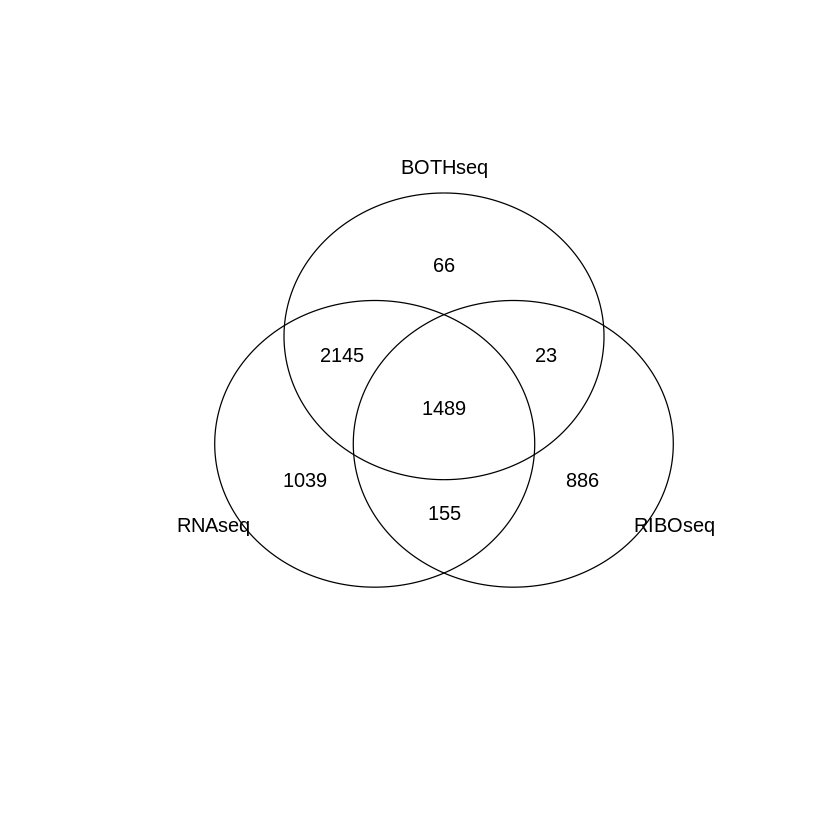

In [51]:
gplots::venn(list(RNAseq = degs.rna, RIBOseq = degs.ribo, BOTHseq = degs.both ))

Набор ДЭГов, полученный в результатае анализа с условием как метода, так и типа ткани (BOTHseq) даёт нам 3273 гена. Это промежуточное значение между результатами первух двух вариантов анализа (RNA-seq и Ribo-seq). В значительной степени последний варинат анализа перекрывается с общими генами для первух двух варинатов (1489 из 1644). 